In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import *
sys.path.append('./tests')
from plot_time_space import *

In [127]:
u,v,w = np.genfromtxt('store.dat',unpack=True)
nk = int(round(np.size(u)**0.25))

In [11]:
# Calc number of lines 
nel = 0
with open('store.dat','r')as f:
    nel = sum(1 for _ in f)
nk = int(round(nel**0.25))
print("number of lines: %d , number of element in one dir:%d"%(nel,nk))

number of lines: 1048576 , number of element in one dir:32


In [3]:
u = np.zeros((nk,nk,nk,nk))
v = np.zeros((nk,nk,nk,nk))
w = np.zeros((nk,nk,nk,nk))
with open('store.dat','r') as f:
    for n in range(nk):
        for i in range(nk):
            for j in range(nk):
                for k in range(nk):
                    line = np.float64(f.readline().split())
                    u[n,i,j,k] = line[0]
                    v[n,i,j,k] = line[0]
                    w[n,i,j,k] = line[0]
        print("time %g"%n)
    f.close()

time 0
time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15
time 16
time 17
time 18
time 19
time 20
time 21
time 22
time 23
time 24
time 25
time 26
time 27
time 28
time 29
time 30
time 31
time 32
time 33
time 34
time 35
time 36
time 37
time 38
time 39
time 40
time 41
time 42
time 43
time 44
time 45
time 46
time 47
time 48
time 49
time 50
time 51
time 52
time 53
time 54
time 55
time 56
time 57
time 58
time 59
time 60
time 61
time 62
time 63


In [4]:
def get_spectr(uin,vin,win):

    alpha = 1.339e0
    L = 1.0e-1
    sigma = 1.0e+1

  # x,y,z = np.genfromtxt('tests/spectr.dat',unpack=True)
  # x,y,z = np.genfromtxt('../hita/spectrum.dat',unpack=True)
  # x1,y1,z1 = np.genfromtxt('../hita/spectrum_32.dat',unpack=True)
  
  # uvel,vvel,wvel = np.genfromtxt('./store.dat',unpack=True)
  # nk = int(round(np.size(uvel)**(1./3.)))
  # nel = nk

  # ufft = fftn(uvel.reshape(nk,nk,nk))
  # vfft = fftn(vvel.reshape(nk,nk,nk))
  # wfft = fftn(wvel.reshape(nk,nk,nk))

    uvel = uin
    vvel = vin
    wvel = win
    nk = np.shape(uin)[0]
    nel = nk

    ufft = fftn(uvel)
    vfft = fftn(vvel)
    wfft = fftn(wvel)
    muu = ufft*np.conj(ufft) / nel**6
    mvv = vfft*np.conj(vfft) / nel**6
    mww = wfft*np.conj(wfft) / nel**6

    # calc std
    umean = np.array([np.mean(uvel),np.mean(vvel),np.mean(wvel)])
    std_i = np.array([np.std(uvel),np.std(vvel),np.std(wvel)])
    sigma = np.sqrt(np.sum(std_i[:]**2))
    print(std_i[0],np.sqrt(np.mean((uvel[:]-umean[0])**2)), sigma)
    dx = 10.
    k = np.arange(-nk//2,nk//2)*dx
    k = np.roll(k,nk//2)
    spectrum = np.zeros(nk)
    count = np.zeros(nk)
    # ?np.meshgrid(k,k,k)
    X,Y,Z = np.meshgrid(k,k,k)
    r = np.sqrt(X**2+Y**2+Z**2) #*dx
    # print(np.shape(r),r.min(),r.max(),k.max(),r[:,0,0])
    for i,ki in enumerate(k[:nk//2]):
        t = np.where((r<=ki+dx/2)&(r>ki-dx/2))
        spectrum[i] = np.sum(muu[t].real) + np.sum(mvv[t].real) + np.sum(mww[t].real)
        count[i] = np.size(t[0])  
        spectrum[i] *= 2.*np.pi*k[i]**2/dx**3/(count[i]+1.0e-30)
    return [k,spectrum]


In [5]:
def get_e0(uin,vin,win):
    uvel = uin
    vvel = vin
    wvel = win
    nk = np.shape(uin)[0]
    nel = nk

    ufft = fftn(uvel) / nk**3
    vfft = fftn(vvel) / nk**3
    wfft = fftn(wvel) / nk**3
    muu = ufft*np.conj(ufft) 
    mvv = vfft*np.conj(vfft) 
    mww = wfft*np.conj(wfft) 
    return [muu[0,0,0].real , mvv[0,0,0].real , mww[0,0,0].real]
    

In [9]:
tmpl = np.zeros((nk,nk,nk))
u = np.zeros((nk,nk,nk))
v = np.zeros((nk,nk,nk))
w = np.zeros((nk,nk,nk))
kk = np.zeros((nk,nk))
ee = np.zeros((nk,nk))
rx = np.zeros((nk,nk))
r1 = np.zeros((nk,nk))
r2 = np.zeros((nk,nk))
dsig = np.zeros((nk,3))
en_time = np.zeros((nk,3))
f = open('store.dat','r')
f.seek(0,0)
for l in range(nk):  # timestep
    for i in range(nk):
        for j in range(nk):
            for k in range(nk):
                line = f.readline()
#                 a,b,c = np.float64(line.split())
#                 if (j==0 and k == 0): print(line,a,b,c )
                u[i,j,k],v[i,j,k],w[i,j,k] = np.float64(line.split())
    kk[l,:],ee[l,:] = get_spectr(u,v,w)
    en_time[l,:] = get_e0(u,v,w)
    dsig[l,:] = np.array([np.std(u),np.std(v),np.std(w)])
    u[:,:,:] = 0.0e0
    v[:,:,:] = 0.0e0
    w[:,:,:] = 0.0e0
f.close()

3.50596326423 3.50596326423 7.21704844816
3.12287576313 3.12287576313 6.29118367404
3.28587683405 3.28587683405 6.51635883255
3.82133004359 3.82133004359 7.09559885161
3.17549108165 3.17549108165 7.13203813188
4.40416603668 4.40416603668 7.3045156571
3.76143773963 3.76143773963 8.18935655005
3.76451194352 3.76451194352 6.90474533492
4.18469747087 4.18469747087 5.93143646098
4.23119269033 4.23119269033 6.74960322826
3.76968277749 3.76968277749 7.38008410686
3.71051127204 3.71051127204 7.85179880022
4.07247945166 4.07247945166 8.36130219374
3.35893055117 3.35893055117 6.69094919114
3.18383755401 3.18383755401 6.40516909867
3.25175876392 3.25175876392 6.49606458261
3.07575078253 3.07575078253 7.35739291476
4.82479254577 4.82479254577 7.84885473432
3.37058961123 3.37058961123 6.17322984642
3.87778857253 3.87778857253 6.21152322462
2.82472049333 2.82472049333 5.9199041809
3.71154879654 3.71154879654 6.56497368661
3.30401214954 3.30401214954 6.04169637797
3.66844901003 3.66844901003 6.647013

In [6]:
print(np.std(u),np.std(v),np.std(w))

0.0 0.0 0.0


In [7]:
l = 0
kk[l,:],ee[l,:],rx[l,:],r1[l,:],r2[l,:] = plot_spectr(u,v,w)

0.0 0.0 0.0
Integral Length Scale Longitudal: nan
Integral Length Scale Tangent: nan


./tests/plot_time_space.py:84: RuntimeWarning: invalid value encountered in true_divide
  R1=ifftn(Rij_x)/np.std((uvel))**2/nel**3;
./tests/plot_time_space.py:85: RuntimeWarning: invalid value encountered in true_divide
  R2=ifftn(Rij_y)/np.std((vvel))**2/nel**3;
./tests/plot_time_space.py:86: RuntimeWarning: invalid value encountered in true_divide
  R3=ifftn(Rij_z)/np.std((wvel))**2/nel**3;
/home/sergey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [8]:
kk[0,:],ee[0,:] = get_spectr(u,v,w)

0.0 0.0 0.0


In [14]:
alpha = 1.339e0
L = 1.0e-1
sigma = 1.0e+1
xf = np.linspace(np.log(kk[0,1]/2),np.log(kk[0,nk//2-1]*2.),100)
xf = np.exp(xf)
# plt.loglog(xf,Ek(xf,alpha,L,sigma),c='g',lw=2)
# plt.loglog(kk[0,:nk//2],ee[1,:nk//2])
plt.plot(np.log(xf),np.log(Ek(xf,alpha,L,sigma)),c='g',lw=2)
plt.scatter(np.log(kk[:,:nk//2]),np.log(ee[:,:nk//2]))
# plt.loglog(kk[0,:nk//2],ee[5,:nk//2])
# plt.loglog(kk[0,:nk//2],ee[nk//2,:nk//2])
plt.show()

NameError: name 'kk' is not defined

/home/sergey/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


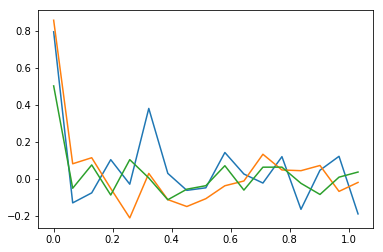

In [17]:
rx = ifftn(en_time[:,0])/nk #/ np.mean(dsig[:,0]*dsig[:,0])
ry = ifftn(en_time[:,1])/nk #/ np.mean(dsig[:,1]*dsig[:,1])
rz = ifftn(en_time[:,2])/nk #/ np.mean(dsig[:,2]*dsig[:,2])
Lx = 2.0*np.pi*1.0e-1
r = np.linspace(0,Lx,nk)/(Lx/2);
f, ax = plt.subplots()
ax.plot(r[:nk//2+1],rx[:nk//2+1])
ax.plot(r[:nk//2+1],ry[:nk//2+1])
ax.plot(r[:nk//2+1],rz[:nk//2+1])
plt.show()

In [120]:
for i,val in enumerate(dsig[:,0]):
    print(i,dsig[i,:], np.sqrt(np.sum(dsig[i,:]**2)) )

0 [ 3.37020252  3.18090553  3.2910945 ] 5.68398874445
1 [ 3.49058077  3.33710744  3.43370248] 5.92543272509
2 [ 3.52144389  3.22377325  3.62064916] 5.99185959659
3 [ 3.71922071  3.24059397  3.61733664] 6.11712156777
4 [ 4.04828662  3.11358124  3.68532668] 6.29798741466
5 [ 3.87132607  3.45984457  3.56061769] 6.29568807163
6 [ 3.88652622  3.52428293  3.44563168] 6.27678531894
7 [ 3.51191004  3.52956165  3.36023574] 6.00687121539
8 [ 3.48233508  3.63442076  3.25912692] 5.99646396881
9 [ 3.1519861   3.29553796  3.46137   ] 5.72509118214
10 [ 3.53746521  3.51039127  3.57376183] 6.13255905226
11 [ 3.34917858  3.65986661  3.47817647] 6.05882268649
12 [ 3.16766487  3.26168878  3.42613778] 5.69307777181
13 [ 3.66940271  3.43854088  3.44307681] 6.09449403595
14 [ 3.63619723  3.60603953  3.34585085] 6.1172027301
15 [ 3.65527868  3.51761429  3.31077236] 6.05771294651
16 [ 3.52280574  3.56498294  3.4133307 ] 6.06383459896
17 [ 3.77892385  3.41838382  3.49142469] 6.17702677266
18 [ 3.59613132  3.32

[  0.      3.125   6.25    9.375  12.5    15.625  18.75   21.875  25.
  28.125  31.25   34.375  37.5    40.625  43.75   46.875 -50.    -46.875
 -43.75  -40.625 -37.5   -34.375 -31.25  -28.125 -25.    -21.875 -18.75
 -15.625 -12.5    -9.375  -6.25   -3.125]


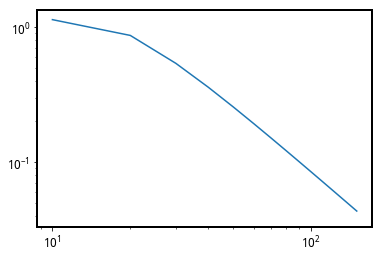

In [206]:
mk = 32
Lx = 1.0e-1
# r = np.linspace(0,Lx,nk)/(Lx/2);
dx = 10.
k = np.arange(-mk//2,mk//2)*dx
k = np.roll(k,mk//2)
print(fftfreq(mk,0.01))
ek = Ek(k,alpha=1.339, L=0.1, sigma=10.0)
plt.loglog(k,ek)
plt.show()

In [217]:
wt = np.random.random((mk,mk))
tt = np.arange(mk)*1.0e-2/mk
rt = np.zeros(mk)
dtmp = np.zeros(mk)
for i in range(mk):
    for m in range(mk):
        dtmp[m] = np.sum(np.cos(tt[i]*2.0e0*np.pi*1.0e1*wt[m,:]*k[m]/3.0e0))
    rt[i] = np.sum(Ek(k[:],alpha=1.339, L=0.1, sigma=10.0)*dtmp[:])*2.0e0 / mk


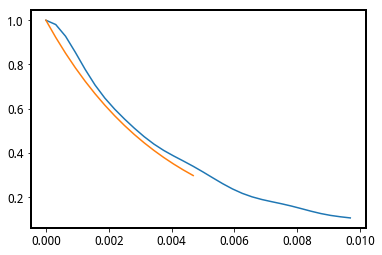

In [220]:
plt.plot(tt[:mk],rt[:mk]/rt[0])
plt.plot(tt[:mk//2],np.exp(-tt[:mk//2]/l11))
# plt.semilogy(tt[:mk],rt[:mk]/rt[0])
# plt.semilogy(tt[:mk//2],np.exp(-tt[:mk//2]/l11))
plt.show()

In [219]:
l11 = np.trapz(np.real(rt[:mk]/rt[0]),dx=tt[1]-tt[0])
print(l11)

0.00387039634053


In [104]:
from scipy.integrate import quad
result = quad(lambda x: Ek(x,alpha=1.339, L=0.07, sigma=10.0),0.0e0,np.inf)
res2 = quad(lambda x: Ek(x,alpha=1.339, L=0.07, sigma=10.0),2.0e0*np.pi/0.1,2.0e0*np.pi*32/0.1)
print(result,np.sqrt(2.0e0*result[0]),res2,np.sqrt(4.0e0*res2[0]))

(49.99945030116968, 1.0259501692644335e-07) 9.99994502997 (19.62270477389099, 4.785059191535786e-08) 8.85950444977


In [105]:
result[0] / res2[0]

2.548040694557893

In [128]:
u = u.reshape(nk,nk,nk,nk)
v = v.reshape(nk,nk,nk,nk)#/nk**4
w = w.reshape(nk,nk,nk,nk)#/nk**4
ufft = fftn(u)#/nk**4
vfft = fftn(v)#/nk**4
wfft = fftn(w)#/nk**4

# ufft1 = fftn(u[0,:,:,:])#/nk**4
# vfft1 = fftn(v[0,:,:,:])#/nk**4
# wfft1 = fftn(w[0,:,:,:])#/nk**4


In [129]:
# u,v,w = np.genfromtxt('store.dat',unpack=True)
# nk = 128
# u = u.reshape(nk,nk,nk,1)
# v = v.reshape(nk,nk,nk,1)#/nk**4
# w = w.reshape(nk,nk,nk,1)#/nk**4
dx = 1.0e+1 #2.0e0 * np.pi / 1.0e-1
k = np.arange(-nk//2,nk//2)*dx
k = np.roll(k,nk//2)
spectrum = np.zeros((nk,nk))
corr11 = np.zeros((nk,nk))
count = np.zeros(nk)
e0 = np.zeros(nk)
# ?np.meshgrid(k,k,k)
X,Y,Z = np.meshgrid(k,k,k)
r = np.sqrt(X**2+Y**2+Z**2) #*dx
# print(np.shape(r),r.min(),r.max(),k.max(),r[:,0,0])
for j,wi in enumerate(k[:]):   # step by times
    ufft1 = fftn(u[j,:,:,:],shape=(nk,nk,nk))/nk**3
    vfft1 = fftn(v[j,:,:,:],shape=(nk,nk,nk))/nk**3
    wfft1 = fftn(w[j,:,:,:],shape=(nk,nk,nk))/nk**3
    muu = ufft1*np.conj(ufft1)
    mvv = vfft1*np.conj(vfft1)
    mww = wfft1*np.conj(wfft1)
    cor1 = ifftn(muu)*nk**3
    cor2 = ifftn(mvv)*nk**3
    cor3 = ifftn(mww)*nk**3
    corr11[j,:] = (cor1[:,0,0].real+cor2[0,:,0].real+cor3[0,0,:].real) / 3.0e0
    e0[j] = muu[0,0,0].real + mvv[0,0,0].real + mww[0,0,0].real
    for i,ki in enumerate(k[:nk//2]):
        t = np.where((r<=ki+dx/2)&(r>ki-dx/2))
        spectrum[j,i] = np.sum(muu[t].real) + np.sum(mvv[t].real) + np.sum(mww[t].real)
        count[i] = np.size(t[0])  
        spectrum[j,i] *= 2.*np.pi*k[i]**2/dx**3/(count[i]+1.0e-30)
    del(ufft1)
    del(vfft1)
    del(wfft1)
    del(cor1)
    del(cor2)
    del(cor3)
    del(muu)
    del(mvv)
    del(mww)
    del(t)


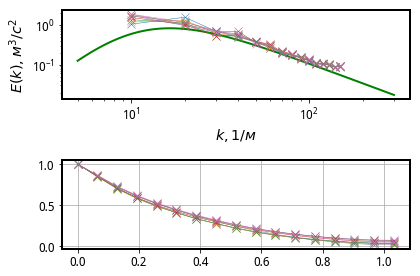

In [130]:
font = {'family': 'Droid Sans',
      'weight': 'normal',
      'size': 12}
m.rc('axes',linewidth=2)
m.rc('font',**font)
m.rc('lines',markeredgewidth=1.0)
f,ax = plt.subplots(2,1)
r = np.linspace(0,0.1,nk)/(0.1/2)
xf = np.linspace(np.log(k[1]/2),np.log(k[nk//2-1]*2.),100)
xf = np.exp(xf)
ax[0].loglog(xf,Ek(xf,alpha=1.339,L=7.0e-2,sigma=1.0e+1),c='g',lw=2)
for j in range(0,nk,4):
    ax[0].loglog(k[:nk//2],spectrum[j,:nk//2],marker='x',ls='-',lw=0.5,ms=8,alpha=0.98,mew=0.5)
    ax[1].plot(r[:nk//2+1],corr11[j,:nk//2+1]/corr11[j,0],marker='x',ls='-',lw=0.5,ms=8,alpha=0.98,mew=0.5)
# ax.loglog(k[:nk//2],spectrum[5,:nk//2],'rx-',lw=0.5,ms=8,alpha=0.8,mew=0.5)
# ax.loglog(k[:nk//2],spectrum[10,:nk//2],'mx-',lw=0.5,ms=8,alpha=0.8,mew=0.5)
# ax.loglog(k[:nk//2],spectrum[15,:nk//2],'yx-',lw=0.5,ms=8,alpha=0.8,mew=0.5)
# ax.loglog(x,y,'bx')
# ax.loglog(x1,y1,'ro')
ax[0].set_xlabel(u'$k, 1/м$',size='large')
ax[0].set_ylabel(u'$E(k), м^3/с^2$',size='large')
plt.grid()
plt.tight_layout()
plt.show()


In [131]:
# Rij_x=(ufft*np.conj(ufft)) # compute velo. correlation tensor
# Rij_y=(vfft*np.conj(vfft))
# Rij_z=(wfft*np.conj(wfft))

R1=ifftn(ufft*np.conj(ufft))/nk**4
R2=ifftn(vfft*np.conj(vfft))/nk**4
R3=ifftn(wfft*np.conj(wfft))/nk**4

# Rij1_x=(ufft1*np.conj(ufft1)) # compute velo. correlation tensor
# Rij1_y=(vfft1*np.conj(vfft1))
# Rij1_z=(wfft1*np.conj(wfft1))

# R11=ifftn(Rij1_x)/nk**3
# R12=ifftn(Rij1_y)/nk**3
# R13=ifftn(Rij1_z)/nk**3


In [132]:
# np.shape()
rtt = (R1[:,0,0,0]+R2[:,0,0,0]+R3[:,0,0,0])/3.0e0
r11 = (R1[:,:,0,0]+R2[:,0,:,0]+R3[:,:,0,0])/3.0e0

# r111 = (R11[:,0,0]+R12[0,:,0]+R13[0,0,:])/3.0e0


In [133]:
r = np.linspace(0,0.1,nk)/(0.1/2);

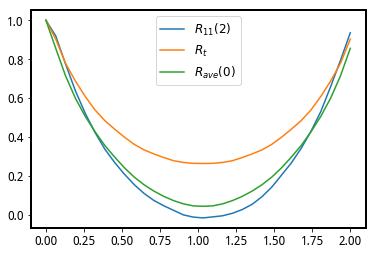

In [134]:
i = 2
f, ax = plt.subplots(1)
a = [np.mean(corr11[:,i]) for i in range(nk)]
ax.plot(r,r11[i,:].real/r11[i,0].real,label=u'$R_{11}(%d)$'%i)
# ax.plot(r,r11[:,i].real/r11[0,i],label=u'$R_{11}(%d)$'%i)
ax.plot(r,rtt.real/rtt[0].real,label=r'$R_{t}$')
# ax.plot(r,R1[:,0,0,0].real/R1[0,0,0,0].real,label=r'$R_{t}^{x}$',alpha=0.4)
# ax.plot(r,R2[:,0,0,0].real/R2[0,0,0,0].real,label=r'$R_{t}^{y}$',alpha=0.4)
# ax.plot(r,R3[:,0,0,0].real/R3[0,0,0,0].real,label=r'$R_{t}^{z}$',alpha=0.4)
# ax.plot(r,r111.real/r111[0],label=r'$R_{11}(0)$')
ax.plot(r,a/a[0],label=r'$R_{ave}(0)$')
plt.legend(loc=0)
plt.show()

In [135]:
ltt = np.trapz(np.real(rtt[:nk//2+1]/rtt[0]),dx=r[1]-r[0])
print("Integral Time Scale: %g"%(ltt*0.01))
l11 = np.trapz(np.real(r11[0,:nk//2+1]/r11[0,0]),dx=r[1]-r[0])
print("Integral Space Scale: %g"%(l11*0.1))
# l11 = np.trapz(np.real(a[:nk//2+1]/a[0]),dx=r[1]-r[0])
# print("Integral Space Scale: %g"%(l11*0.1))


Integral Time Scale: 0.00489896
Integral Space Scale: 0.0276535


In [136]:
l11*0.1/np.sqrt(R1[0,0,0,0].real+R2[0,0,0,0].real+R3[0,0,0,0].real)

0.0023504941435980131

In [137]:
l11*0.1/2./(ltt*0.01)

2.822380552096452

In [138]:
print(np.sqrt(R1[0,0,0,0].real),(R2[0,0,0,0].real)**0.5,(R3[0,0,0,0].real)**0.5,np.sqrt(R1[0,0,0,0].real+R2[0,0,0,0].real+R3[0,0,0,0].real))

6.75370828791 6.82842342521 6.79517333075 11.7649616534


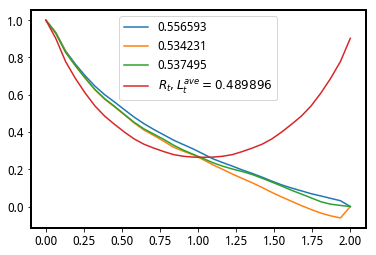

In [139]:
rt = np.zeros((nk,3))
for i, val in enumerate(rt[:nk-1]):
    s1 = np.mean(u[i:,:,:,:]*u[:nk-i,:,:,:])
    s2 = np.mean(v[i:,:,:,:]*v[:nk-i,:,:,:])
    s3 = np.mean(w[i:,:,:,:]*w[:nk-i,:,:,:])
    rt[i,:] = [s1,s2,s3]
ltx = np.trapz(rt[:nk//2,0]/rt[0,0],dx=r[1]-r[0])
lty = np.trapz(rt[:nk//2,1]/rt[0,1],dx=r[1]-r[0])
ltz = np.trapz(rt[:nk//2,2]/rt[0,2],dx=r[1]-r[0])
f, ax = plt.subplots(1)
ax.plot(r,rt[:,0]/rt[0,0],label='%g'%ltx)
ax.plot(r,rt[:,1]/rt[0,1],label='%g'%lty)
ax.plot(r,rt[:,2]/rt[0,2],label='%g'%ltz)
ax.plot(r,rtt.real/rtt[0].real,label=r'$R_{t},L_{t}^{ave}=%g$'%(ltt))
plt.legend(loc=0)
plt.show()


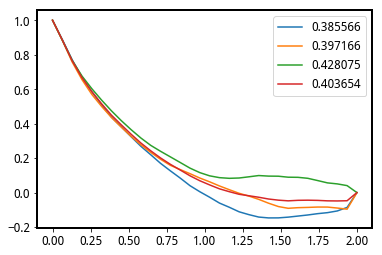

In [140]:
rx = np.zeros((nk,3))
rxx = np.zeros(nk)
for i, val in enumerate(rt[:nk-1]):
    s1 = np.mean(u[:,i:,:,:]*u[:,:nk-i,:,:])
    s2 = np.mean(v[:,:,i:,:]*v[:,:,:nk-i,:])
    s3 = np.mean(w[:,:,:,i:]*w[:,:,:,:nk-i])
    rx[i,:] = [s1,s2,s3]
    rxx[i] = (s1+s2+s3)/3.0e0
lxx = np.trapz(rx[:nk//2,0]/rx[0,0],dx=r[1]-r[0])
lxy = np.trapz(rx[:nk//2,1]/rx[0,1],dx=r[1]-r[0])
lxz = np.trapz(rx[:nk//2,2]/rx[0,2],dx=r[1]-r[0])
lxa = np.trapz(rxx[:nk//2]/rxx[0],dx=r[1]-r[0])
f, ax = plt.subplots(1)
ax.plot(r,rx[:,0]/rx[0,0],label='%g'%lxx)
ax.plot(r,rx[:,1]/rx[0,1],label='%g'%lxy)
ax.plot(r,rx[:,2]/rx[0,2],label='%g'%lxz)
ax.plot(r,rxx/rxx[0],label='%g'%(lxa))
# plt.plot(r,r.real/rtt[0],label=r'$R_{t},L_{t}^{ave}=%g$'%ltt)
plt.legend(loc=0)
plt.show()


In [141]:
lxa * 0.1 / (ltx*0.01)

7.252236264259782